**What is Market Basket Analysis ?**

Market Basket Analysis is one of the key techniques used by large retailers to uncover associations between items. 
It works by looking for combinations of items that occur together frequently in transactions. To put it another way, it allows retailers to identify relationships between the items that people buy.

# Market Basket Analysis For Foodmart Store Dataset

**About Foodmart**

Food Mart (FM) is a chain of convenience stores in the United States. The private company's headquarters are located in Mentor, Ohio, and there are currently approximately **325 stores located in the US**. Food Mart operates on the franchise system.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import networkx as nx
import matplotlib as mpl
import gapminder as gapminder


%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
## Get Multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action = 'ignore', category = DeprecationWarning)

## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Loading Customers Dataset

In [3]:
customer = pd.read_csv("data/customer.csv")
customer.head()

,customer_id,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned
0,1,Tlaxiaco,Oaxaca,Mexico,30,$30K - $50K,F,4,2,Partial High School,10/09/91,Bronze,Skilled Manual,Y,4
1,2,Sooke,BC,Canada,101,$70K - $90K,M,1,0,Partial High School,11/03/93,Bronze,Professional,N,3
2,3,Issaquah,WA,USA,21,$50K - $70K,F,1,1,Bachelors Degree,11/06/91,Bronze,Professional,Y,2
3,4,Burnaby,BC,Canada,92,$10K - $30K,M,4,4,Partial High School,21/05/94,Normal,Skilled Manual,N,2
4,5,Novato,CA,USA,42,$30K - $50K,F,3,0,Partial College,21/08/92,Silver,Manual,N,3


### Loading Products Dataset

In [4]:
product = pd.read_csv("data/product.csv")
product.head()

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,0,0,30,14,16.9,12.60,7.40
1,52,2,Washington,Washington Mango Drink,96516502499,0.74,7.42,4.42,0,1,18,8,13.4,3.71,22.60
2,52,3,Washington,Washington Strawberry Drink,58427771925,0.83,13.10,11.10,1,1,17,13,14.4,11.00,7.77
3,19,4,Washington,Washington Cream Soda,64412155747,3.64,10.60,9.60,1,0,26,10,22.9,18.90,7.93
4,19,5,Washington,Washington Diet Soda,85561191439,2.19,6.66,4.65,1,0,7,10,20.7,21.90,19.20


### Loading Departments Dataset

In [5]:
product_class = pd.read_csv("data/product_class.csv")
product_class.head()

,product_class_id,subcategory,category,department,family
0,1,Nuts,Specialty,Produce,Food
1,2,Shellfish,Seafood,Seafood,Food
2,3,Canned Fruit,Fruit,Canned Products,Food
3,4,Spices,Baking Goods,Baking Goods,Food
4,5,Pasta,Starchy Foods,Starchy Foods,Food


### Loading Region Dataset

In [6]:
region = pd.read_csv("data/region.csv")
region.head()

,region_id,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id
0,0,None,None,No District,No Region,No Country,0
1,1,San Francisco,CA,San Francisco,Central West,USA,123
2,2,Mexico City,DF,Mexico City,Mexico Central,Mexico,118
3,3,Los Angeles,CA,Los Angeles,South West,USA,116
4,4,Guadalajara,Jalisco,Guadalajara,Mexico West,Mexico,114


### Loading Sales Dataset

In [7]:
df = pd.read_csv("data/sales.csv")
df.head()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales
0,337,371,6280,2,1.50,0.5100,2
1,1512,371,6280,2,1.62,0.6318,3
2,963,371,4018,2,2.40,0.7200,1
3,181,371,4018,2,2.79,1.0323,3
4,1383,371,4018,2,5.18,2.1756,2


### Loading Stores Dataset

In [8]:
store = pd.read_csv("data/store.csv")
store.head()

,store_id,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,0,HeadQuarters,0,HQ,0,1 Alameda Way,Alameda,CA,55555,USA,Sam,178-555-8979,124-555-9116,########,4/12/1990 0:00,25638,18697,3648,3293,0,0,0,0,0
1,1,Supermarket,28,Store 1,1,2853 Bailey Rd,Acapulco,Guerrero,55555,Mexico,Jones,262-555-5124,262-555-5121,9/1/1982 0:00,5/12/1990 0:00,23593,17475,3671,2447,0,0,0,0,0
2,2,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0
3,3,Supermarket,76,Store 3,3,1501 Ramsey Circle,Bremerton,WA,55555,USA,Davis,509-555-1596,509-555-1591,14/6/1959 0:00,19/11/1967 0:00,39696,24390,9184,6122,0,0,1,1,0
4,4,Gourmet Supermarket,27,Store 4,4,433 St George Dr,Camacho,Zacatecas,55555,Mexico,Johnson,304-555-1474,304-555-1471,27/9/1994 0:00,1/12/1995 0:00,23759,16844,4149,2766,1,0,1,1,1


### Loading Time by Day Dataset

In [9]:
time_by_day = pd.read_csv("data/time_by_day.csv")
time_by_day.head()

,time_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch
0,1,1996-01-01,Monday,1996,1,1,33603
1,2,1996-01-02,Tuesday,1996,1,2,33604
2,3,1996-01-03,Wednesday,1996,1,3,33605
3,4,1996-01-04,Thursday,1996,1,4,33606
4,5,1996-01-05,Friday,1996,1,5,33607


## Merging the datasets

In [10]:
df = df.merge(customer,on = 'customer_id')

In [11]:
df = df.merge(product,on = 'product_id')

In [12]:
df = df.merge(product_class,on = 'product_class_id')

In [13]:
df = df.merge(store,on = 'store_id')

In [14]:
df = df.merge(region,on = 'region_id')

In [15]:
df = df.merge(time_by_day,on = 'time_id')

In [16]:
df.head()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
1,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,58,Just Right,Just Right Chicken Noodle Soup,22934378981,2.40,20.50,18.50,1,1,6,13,6.68,10.6,9.16,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
2,1512,371,6280,2,1.62,0.6318,3,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,5,Jardon,Jardon Spaghetti,53042894005,0.54,13.70,10.60,1,0,28,13,12.80,12.6,9.81,Pasta,Starchy Foods,Starchy Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
3,181,371,4018,2,2.79,1.0323,3,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,61,High Top,High Top Lettuce,79397689700,0.93,16.10,14.10,0,1,23,5,16.10,15.1,14.50,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
4,483,371,4382,2,3.88,1.7072,2,Anacortes,WA,USA,79,$130K - $150K,F,0,0,Graduate Degree,25/07/92,Silver,Management,N,2,61,Tell Tale,Tell Tale Corn on the Cob,80806578993,1.94,13.00,10.00,1,0,3,10,20.80,21.6,5.86,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973


## Exploratory Data Analysis (EDA)

In [17]:
df.shape

(269720, 74)

### Data Exploration

In [18]:
df.describe()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,customer_region_id,total_children,num_children_at_home,num_cars_owned,product_class_id,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,region_id,store_number,store_postal_code,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_district_id,the_year,the_month,day_of_month,day_since_epoch
count,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,2.697200e+05,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.0,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000
mean,783.862873,800.004990,5119.390405,12.753730,6.542142,2.618622,3.090201,57.723454,2.535351,0.816091,2.205632,54.382471,5.563373e+10,2.117859,13.797998,11.786979,0.560911,0.353956,18.897490,9.469887,12.903214,12.938429,12.963582,39.894947,12.753730,55555.0,28975.729082,19957.547653,5450.413325,3567.816298,0.623484,0.295265,0.614471,0.553111,0.594839,120.811319,1997.678048,6.661100,15.109970,34402.004990
std,447.926131,201.955563,2901.883077,6.349746,3.461318,1.452805,0.835554,29.973844,1.490679,1.292423,1.111834,30.846176,2.580783e+10,0.930726,4.623687,4.684530,0.496277,0.478197,10.244825,2.637010,5.759837,5.844580,5.608001,32.813184,6.349746,0.0,5830.618714,4306.565245,1601.140519,1007.121215,0.484513,0.456163,0.486721,0.497172,0.490924,6.222520,0.467226,3.514326,8.319021,201.955563
min,1.000000,367.000000,3.000000,1.000000,0.500000,0.153000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.003103e+10,0.500000,6.000000,3.050000,0.000000,0.000000,1.000000,5.000000,3.010000,3.000000,3.000000,1.000000,1.000000,55555.0,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,1997.000000,1.000000,1.000000,33969.000000
25%,396.000000,657.000000,2570.000000,7.000000,3.810000,1.498000,3.000000,26.000000,1.000000,0.000000,1.000000,30.000000,3.341941e+10,1.420000,9.670000,7.710000,0.000000,0.000000,10.000000,7.000000,7.860000,7.880000,8.320000,18.000000,7.000000,55555.0,23598.000000,16232.000000,4357.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,116.000000,1997.000000,4.000000,8.000000,34259.000000
50%,787.000000,830.000000,5090.000000,13.000000,5.940000,2.386500,3.000000,66.000000,3.000000,0.000000,2.000000,58.000000,5.639667e+10,2.130000,13.600000,11.600000,1.000000,0.000000,19.000000,9.000000,12.900000,12.800000,12.900000,25.000000,13.000000,55555.0,30268.000000,20141.000000,5188.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,120.000000,1998.000000,7.000000,15.000000,34432.000000
75%,1174.000000,968.000000,7614.000000,17.000000,8.670000,3.486000,4.000000,85.000000,4.000000,1.000000,3.000000,79.000000,7.797237e+10,2.790000,17.700000,16.000000,1.000000,1.000000,28.000000,12.000000,17.700000,18.200000,17.600000,76.000000,17.000000,55555.0,33858.000000,22271.000000,6954.000000,3755.000000,1.000000,1.000000,1.000000,1.000000,1.000000,125.000000,1998.000000,10.000000,22.000000,34570.000000
max,1559.000000,1095.000000,10281.000000,24.000000,23.640000,10.290000,6.000000,109.000000,5.000000,5.000000,4.000000,110.000000,9.998368e+10,3.980000,21.900000,20.800000,1.000000,1.000000,36.000000,14.000000,22.900000,22.900000,22.900000,106.000000,24.000000,55555.0,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,133.000000,1998.000000,12.000000,30.000000,34697.000000


In [19]:
# Check for missing values
df.isnull().sum()

product_id              0
time_id                 0
customer_id             0
store_id                0
store_sales             0
store_cost              0
unit_sales              0
city                    0
state_province          0
country                 0
customer_region_id      0
yearly_income           0
gender                  0
total_children          0
num_children_at_home    0
education               0
date_accnt_opened       0
member_card             0
occupation              0
houseowner              0
num_cars_owned          0
product_class_id        0
brand_name              0
product_name            0
SKU                     0
SRP                     0
gross_weight            0
net_weight              0
recyclable_package      0
low_fat                 0
units_per_case          0
cases_per_pallet        0
shelf_width             0
shelf_height            0
shelf_depth             0
subcategory             0
category                0
department              0
family      

In [20]:
# Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269720 entries, 0 to 269719
Data columns (total 74 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   product_id            269720 non-null  int64  
 1   time_id               269720 non-null  int64  
 2   customer_id           269720 non-null  int64  
 3   store_id              269720 non-null  int64  
 4   store_sales           269720 non-null  float64
 5   store_cost            269720 non-null  float64
 6   unit_sales            269720 non-null  int64  
 7   city                  269720 non-null  object 
 8   state_province        269720 non-null  object 
 9   country               269720 non-null  object 
 10  customer_region_id    269720 non-null  int64  
 11  yearly_income         269720 non-null  object 
 12  gender                269720 non-null  object 
 13  total_children        269720 non-null  int64  
 14  num_children_at_home  269720 non-null  int64  
 15  

In [21]:
# Checking for unique values
df.nunique()

product_id               1559
time_id                   673
customer_id              8842
store_id                   24
store_sales              1069
store_cost              12535
unit_sales                  6
city                      107
state_province             12
country                     3
customer_region_id        108
yearly_income               8
gender                      2
total_children              6
num_children_at_home        6
education                   5
date_accnt_opened        1633
member_card                 4
occupation                  5
houseowner                  2
num_cars_owned              5
product_class_id          102
brand_name                111
product_name             1559
SKU                      1559
SRP                       315
gross_weight              376
net_weight                332
recyclable_package          2
low_fat                     2
units_per_case             36
cases_per_pallet           10
shelf_width               534
shelf_heig

## Univarate Analysis

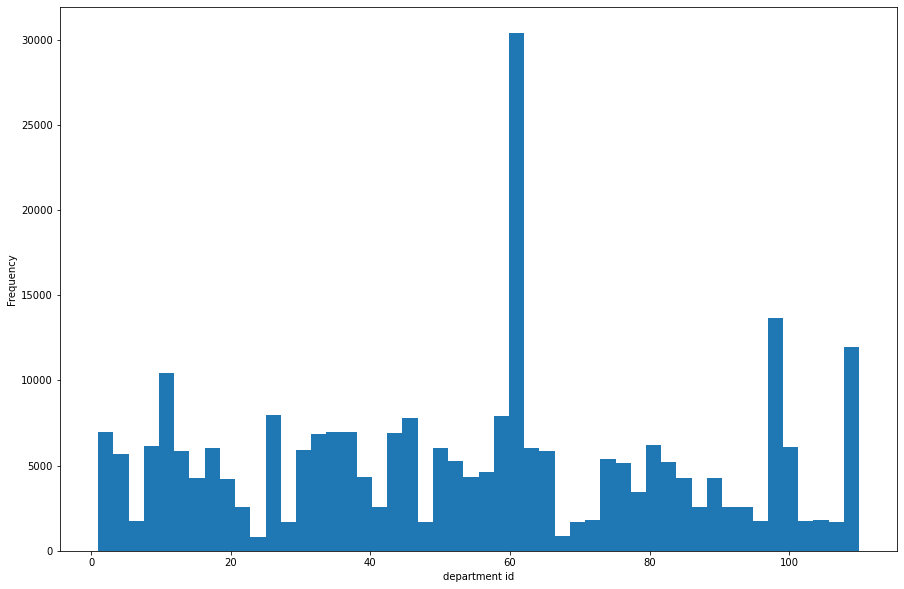

In [22]:
# Frequency Plot of Department id
fig = plt.figure(figsize=(15,10))
df['product_class_id'].plot.hist(bins = 50)
plt.xlabel('department id');

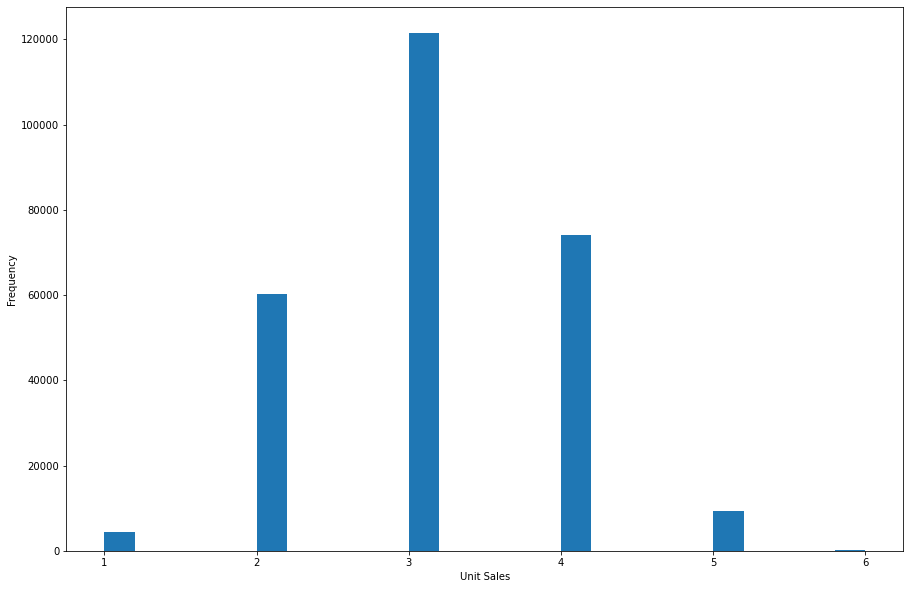

In [23]:
# Frequency plot of unit sales
fig=plt.figure(figsize=(15,10))
df['unit_sales'].plot.hist(bins = 25)
plt.xlabel('Unit Sales');

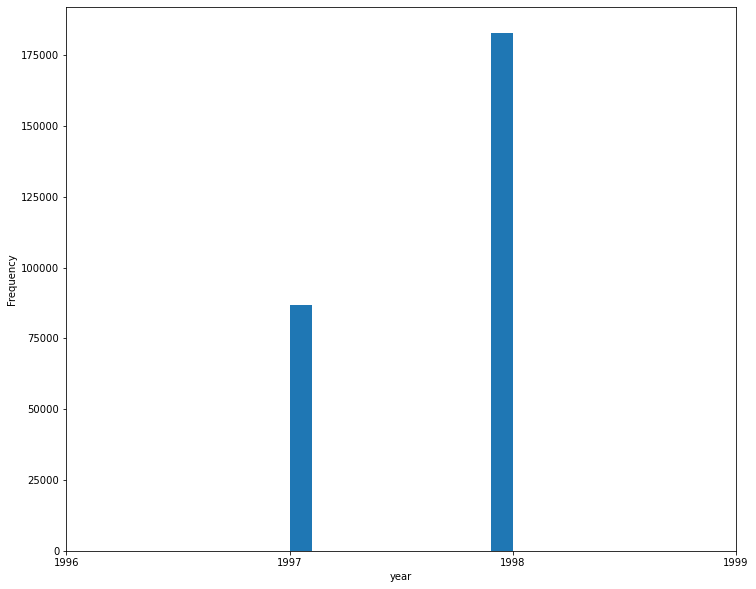

In [24]:
# Year with the highest order rate
fig=plt.figure(figsize=(12,10))
df['the_year'].plot.hist(bins=10)
plt.xlabel('year')
plt.xticks([1996,1997,1998,1999]);

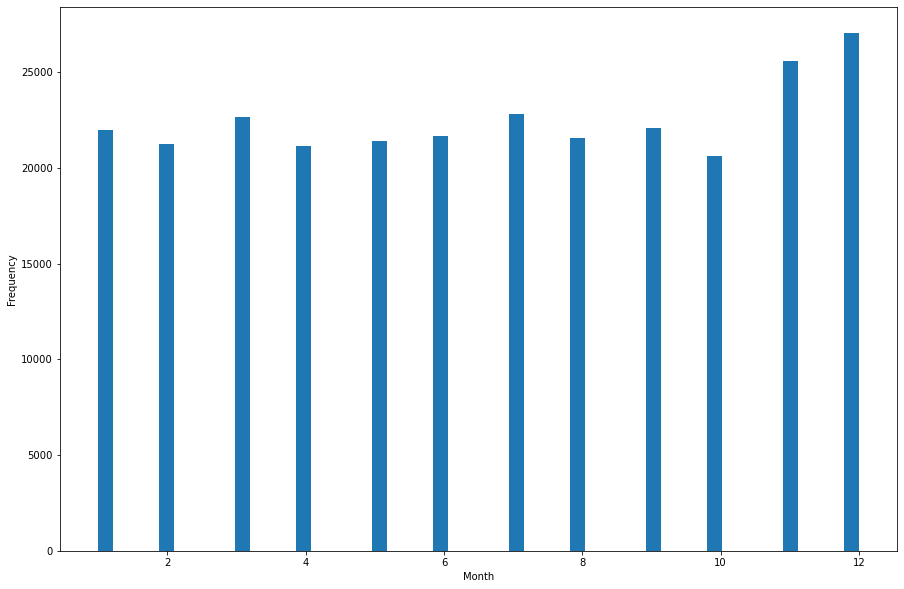

In [25]:
# Month with the highest order rate
fig=plt.figure(figsize=(15,10))
df['the_month'].plot.hist(bins=50)
plt.xlabel('Month');

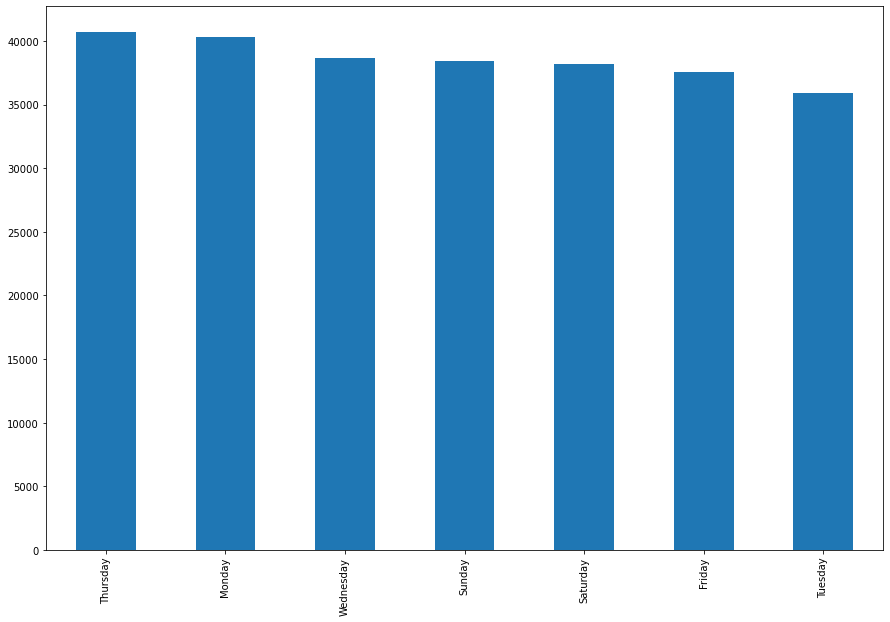

In [26]:
df_day_freq=df['the_day'].value_counts()
fig=plt.figure(figsize=(15, 10))
df_day_freq.plot.bar() ;

In [27]:
# Top 10 choices in Products
df['products'] = 'Products'
products = df.truncate(before = 605, after = 615)

products = nx.from_pandas_edgelist(products, source = 'products', target = 'product_name', edge_attr = True)

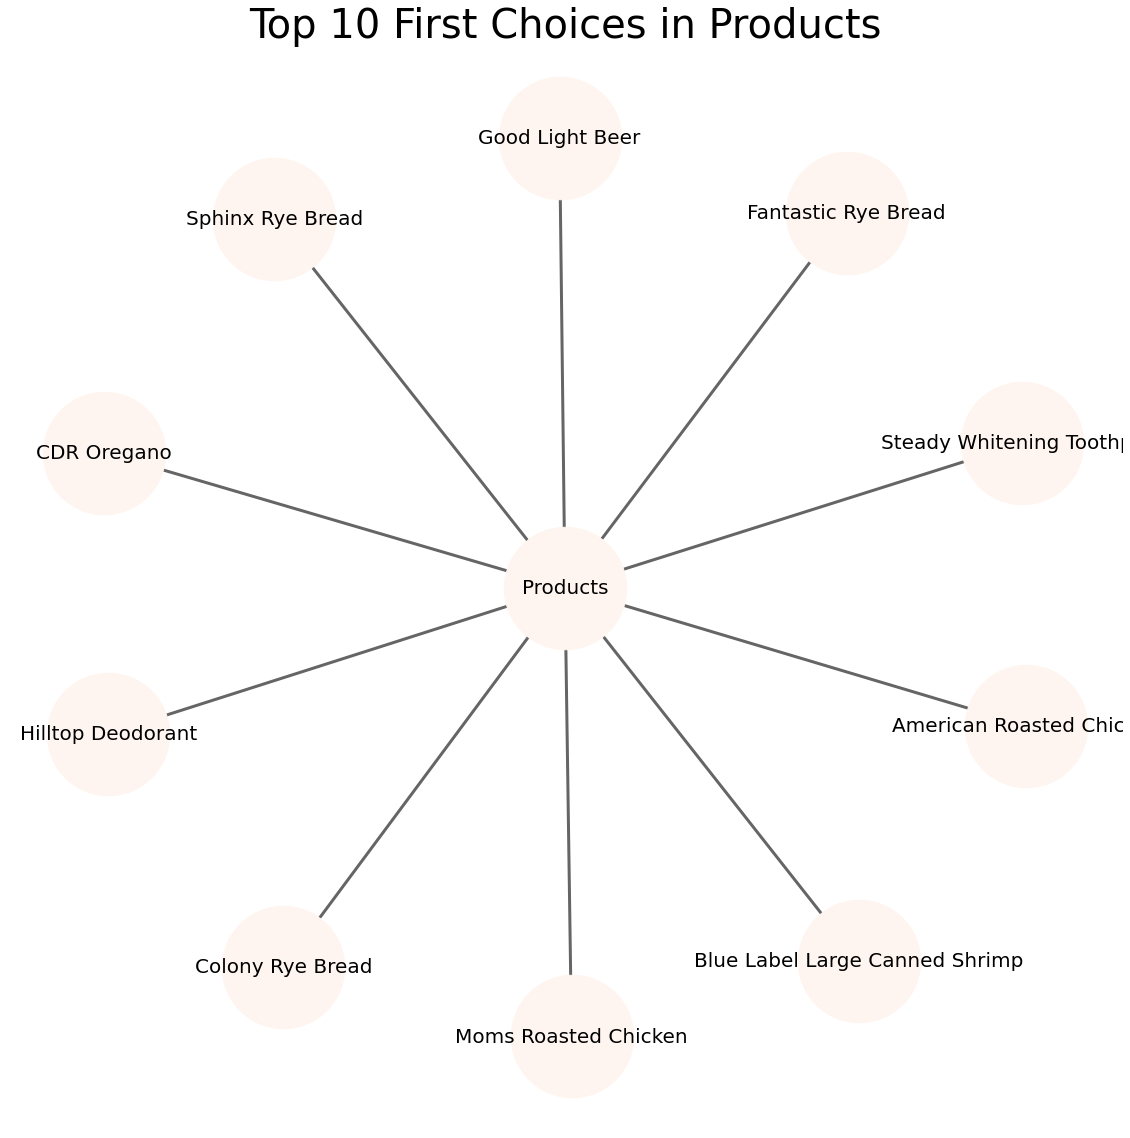

In [28]:
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=(20,20)
pos=nx.spring_layout(products)
color=plt.cm.Reds(np.linspace(0,15,1))
nx.draw_networkx_nodes(products,pos,node_size=15000,node_color=color)
nx.draw_networkx_edges(products, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(products, pos, font_size = 20)
plt.axis('off')
plt.grid()
plt.title('Top 10 First Choices in Products', fontsize = 40)
plt.show();

In [29]:
# Top 10 choices in Departments
df['departments'] = 'Departments'
departments = df.truncate(before = 150, after = 195)

departments = nx.from_pandas_edgelist(departments, source = 'departments', target = 'department', edge_attr = True)

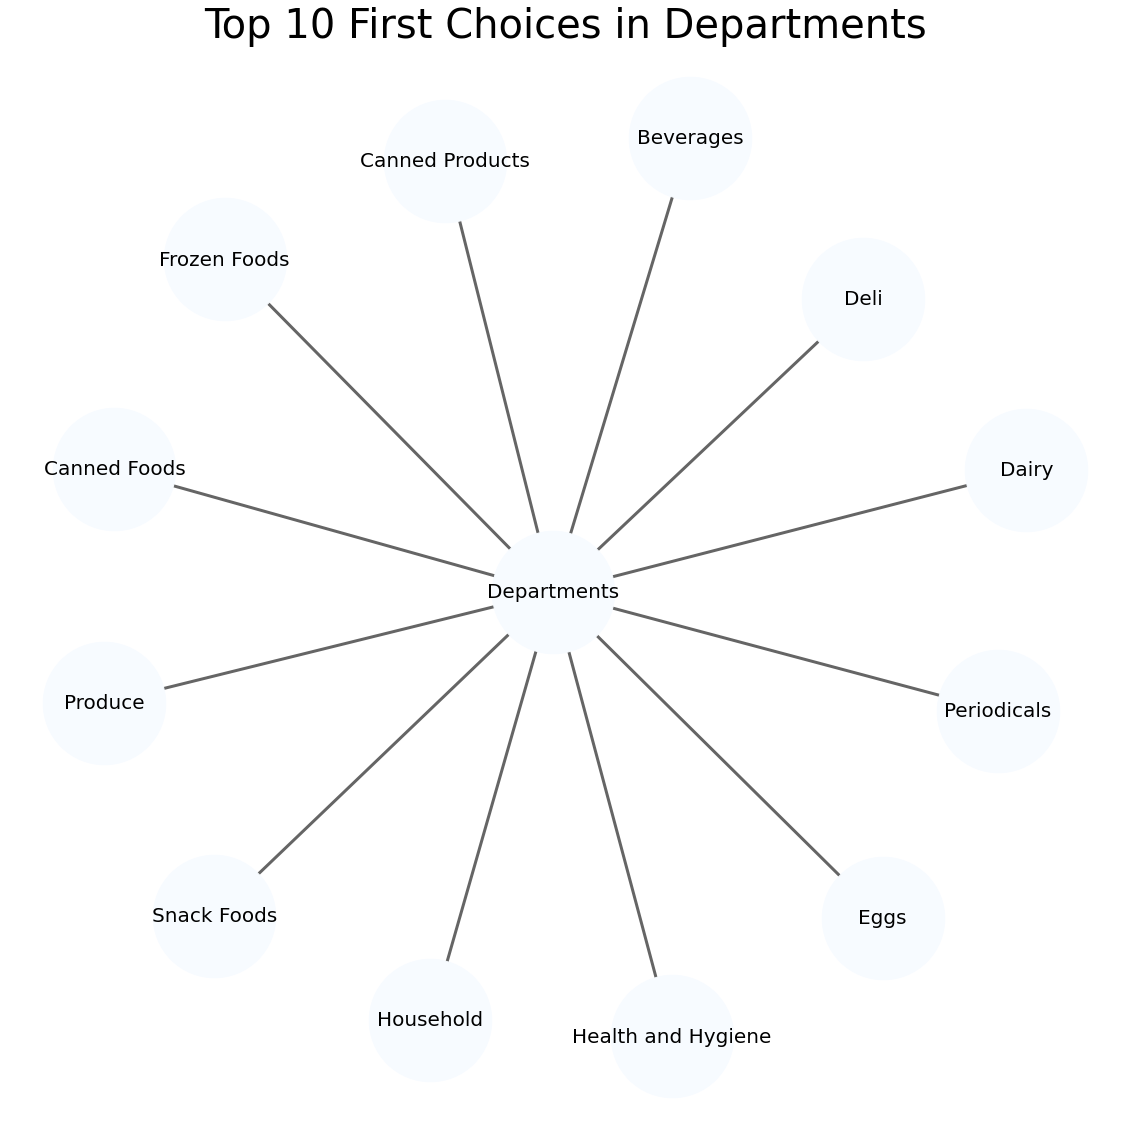

In [30]:
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=(20,20)
pos=nx.spring_layout(departments)
color=plt.cm.Blues(np.linspace(0,15,1))
nx.draw_networkx_nodes(departments,pos,node_size=15000,node_color=color)
nx.draw_networkx_edges(departments, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(departments, pos, font_size = 20)
plt.axis('off')
plt.grid()
plt.title('Top 10 First Choices in Departments', fontsize = 40)
plt.show();

In [31]:
# Most ordered Products
df['product_name'].value_counts().head(10)

Moms Roasted Chicken                     225
Tell Tale Fresh Lima Beans               219
Steady Whitening Toothpast               218
Hilltop Silky Smooth Hair Conditioner    216
Steady Childrens Cold Remedy             214
Nationeel Dried Apples                   214
Sunset Economy Toilet Brush              213
Hilltop Mint Mouthwash                   213
Ebony Mixed Nuts                         213
Special Wheat Puffs                      212
Name: product_name, dtype: int64

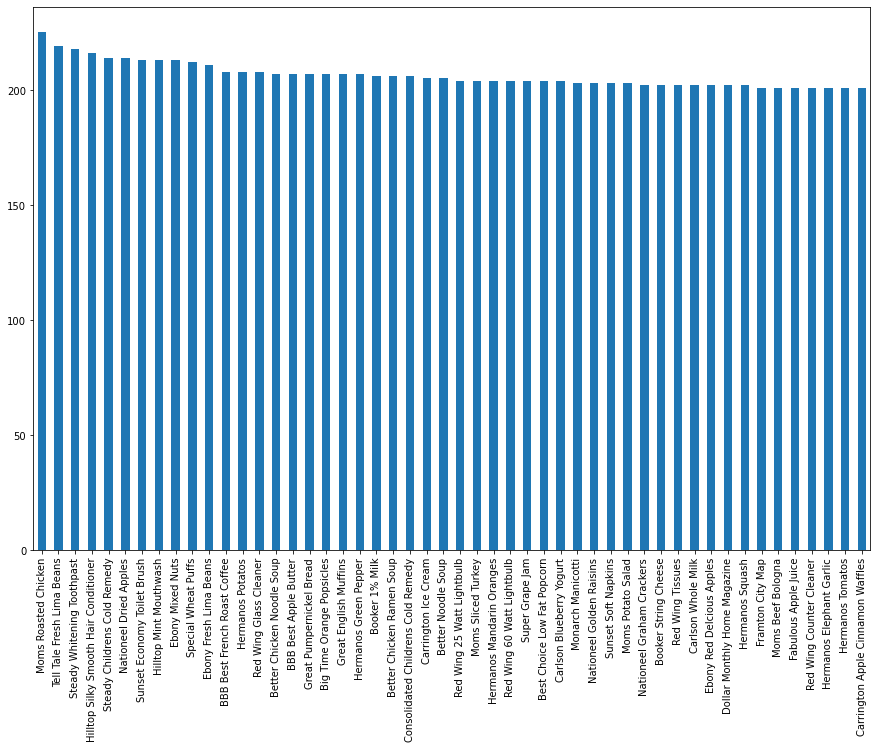

In [32]:
df_freq_products=df['product_name'].value_counts().iloc[:50]
fig=plt.figure(figsize=(15, 10))
df_freq_products.plot.bar();

In [33]:
# Most Visited Departments
df['department'].value_counts().head(10)

Produce               38041
Snack Foods           30983
Household             27590
Frozen Foods          27042
Baking Goods          20573
Canned Foods          19090
Dairy                 17195
Health and Hygiene    16643
Beverages             13624
Deli                  12130
Name: department, dtype: int64

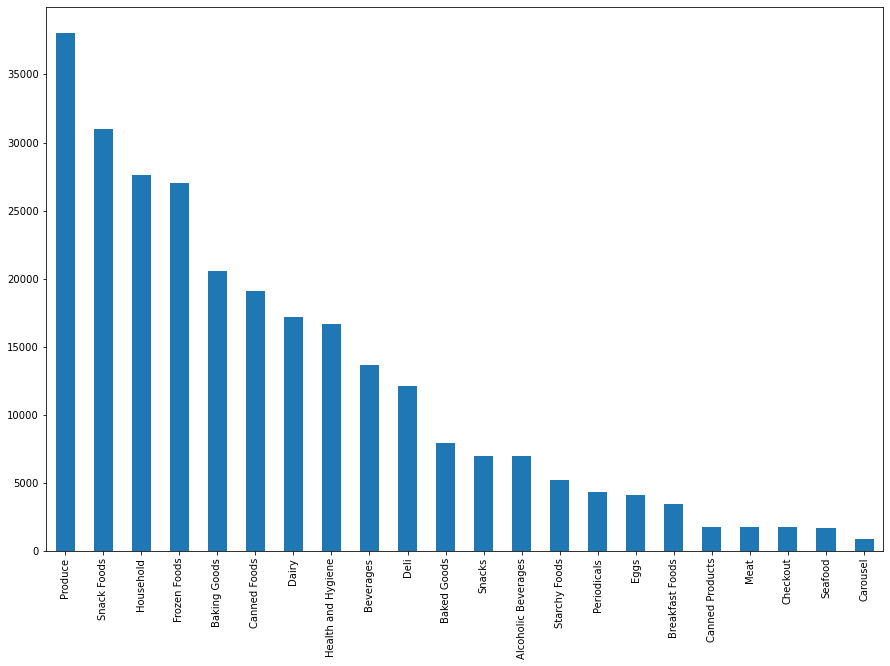

In [34]:
fig=plt.figure(figsize=(15,10))
df['department'].value_counts().plot(kind='bar');

In [35]:
# Most Visisted Aisle
df['subcategory'].value_counts().head(10)

Fresh Vegetables     20859
Fresh Fruit          11972
Soup                  7919
Cheese                7815
Dried Fruit           7758
Cookies               6930
Wine                  5189
Paper Wipes           5128
Canned Vegetables     5092
Frozen Vegetables     4435
Name: subcategory, dtype: int64

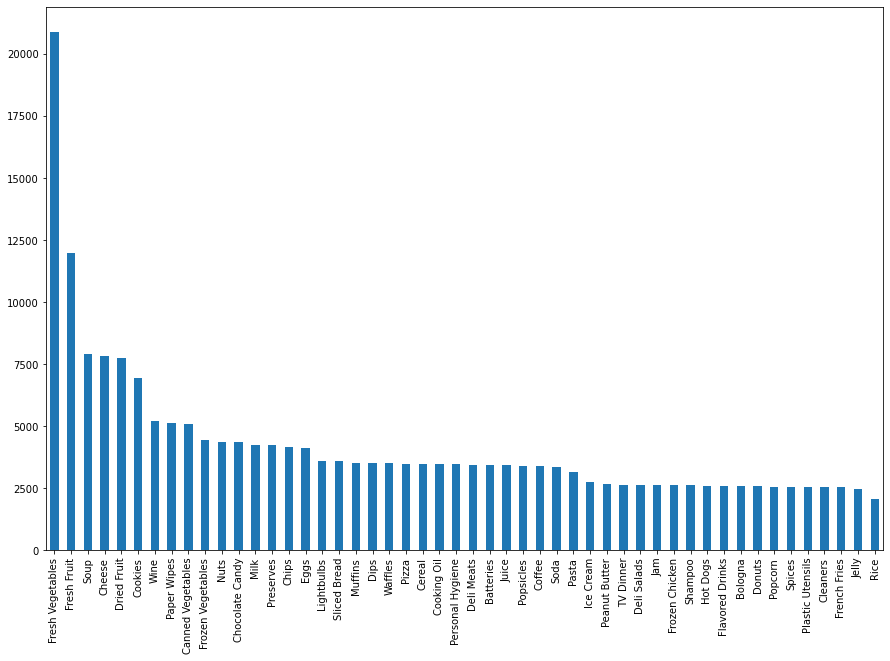

In [36]:
df_subcategory_freq=df['subcategory'].value_counts().iloc[:50]
fig=plt.figure(figsize=(15,10))
df_subcategory_freq.plot.bar();

## Bivarate Analysis

In [37]:
# Bar Plot between customers and their products per order
data_user_orders_num = df.groupby('customer_id')['unit_sales'].count()
data_user_orders_num.head()

customer_id
3    30
5     1
6    16
8    42
9    13
Name: unit_sales, dtype: int64

In [38]:
source_data = {}
for i in range(10):
    source_data[str(10*i)+'~'+str(10*(i+1))]=len([x for x in list(data_user_orders_num) if x>=i*10 and x<(i+1)*10])
    
source_data

{'0~10': 2145,
 '10~20': 2509,
 '20~30': 1510,
 '30~40': 760,
 '40~50': 454,
 '50~60': 276,
 '60~70': 244,
 '70~80': 175,
 '80~90': 160,
 '90~100': 110}

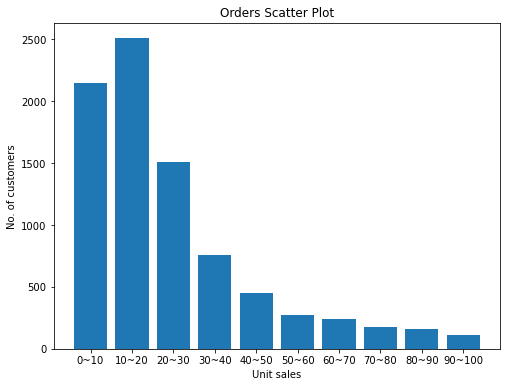

In [39]:
font_size=10
fig_size=(8,6)    
mpl.rcParams['font.size'] = font_size
mpl.rcParams['figure.figsize'] = fig_size
bar_width = 0.3


x_axis = tuple(source_data.keys())
y_axis = tuple(source_data.values())

#assign color
plt.bar(x_axis, y_axis)  

# descrpitions for x-axis, y-axis
plt.xlabel('Unit sales')  
plt.ylabel("No. of customers") 
plt.title("Orders Scatter Plot") 
plt.show();

**Transaction ID** - create transaction id which denotes a basket

In [40]:
df['transaction_id'] = df['customer_id'].astype(str) + df['time_id'].astype(str)
df.head()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch,products,departments,transaction_id
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973,Products,Departments,6280371
1,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,58,Just Right,Just Right Chicken Noodle Soup,22934378981,2.40,20.50,18.50,1,1,6,13,6.68,10.6,9.16,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973,Products,Departments,4018371
2,1512,371,6280,2,1.62,0.6318,3,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,5,Jardon,Jardon Spaghetti,53042894005,0.54,13.70,10.60,1,0,28,13,12.80,12.6,9.81,Pasta,Starchy Foods,Starchy Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973,Products,Departments,6280371
3,181,371,4018,2,2.79,1.0323,3,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,61,High Top,High Top Lettuce,79397689700,0.93,16.10,14.10,0,1,23,5,16.10,15.1,14.50,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973,Products,Departments,4018371
4,483,371,4382,2,3.88,1.7072,2,Anacortes,WA,USA,79,$130K - $150K,F,0,0,Graduate Degree,25/07/92,Silver,Management,N,2,61,Tell Tale,Tell Tale Corn on the Cob,80806578993,1.94,13.00,10.00,1,0,3,10,20.80,21.6,5.86,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973,Products,Departments,4382371


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269720 entries, 0 to 269719
Data columns (total 77 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   product_id            269720 non-null  int64  
 1   time_id               269720 non-null  int64  
 2   customer_id           269720 non-null  int64  
 3   store_id              269720 non-null  int64  
 4   store_sales           269720 non-null  float64
 5   store_cost            269720 non-null  float64
 6   unit_sales            269720 non-null  int64  
 7   city                  269720 non-null  object 
 8   state_province        269720 non-null  object 
 9   country               269720 non-null  object 
 10  customer_region_id    269720 non-null  int64  
 11  yearly_income         269720 non-null  object 
 12  gender                269720 non-null  object 
 13  total_children        269720 non-null  int64  
 14  num_children_at_home  269720 non-null  int64  
 15  

In [42]:
# Filtering out Columns
cols = [76,2,0,23]
order_products = df[df.columns[cols]]
order_products.head()

,transaction_id,customer_id,product_id,product_name
0,6280371,6280,337,Better Turkey Noodle Soup
1,4018371,4018,963,Just Right Chicken Noodle Soup
2,6280371,6280,1512,Jardon Spaghetti
3,4018371,4018,181,High Top Lettuce
4,4382371,4382,483,Tell Tale Corn on the Cob


**Average products bought by customers per order**

In [43]:
data_user_products_num1 = order_products.groupby('transaction_id')['product_id'].count()
data_user_products_num1 = pd.DataFrame(data_user_products_num1)
data_user_products_num1['transaction_id'] = list(data_user_products_num1.index)
data_user_products_num1.columns = ['product_num','orderid']
data_user_products_num2 = pd.merge(data_user_products_num1,df[['transaction_id','customer_id']],on='transaction_id',how='left')

data_user_products_num3 = data_user_products_num2.groupby('customer_id')['product_num'].agg(['sum','count'])
data_user_products_num3['avg'] = data_user_products_num3['sum']/data_user_products_num3['count']

data_user_products_num3.head()

,sum,count,avg
customer_id,,,
3,186,30,6.200000
5,1,1,1.000000
6,72,16,4.500000
8,208,42,4.952381
9,85,13,6.538462


## Feature Products Department Wise

In [44]:
cols = [0,35,37,23]
departments = df[df.columns[cols]]
departments.head()

,product_id,subcategory,department,product_name
0,337,Soup,Canned Foods,Better Turkey Noodle Soup
1,963,Soup,Canned Foods,Just Right Chicken Noodle Soup
2,1512,Pasta,Starchy Foods,Jardon Spaghetti
3,181,Fresh Vegetables,Produce,High Top Lettuce
4,483,Fresh Vegetables,Produce,Tell Tale Corn on the Cob


**List Of Departments**

In [45]:
temp = ['department']
for i in temp:
    print('@@@@@@Value Count in',i,'@@@@@@@@@')
    print(df[i].value_counts())

@@@@@@Value Count in department @@@@@@@@@
Produce                38041
Snack Foods            30983
Household              27590
Frozen Foods           27042
Baking Goods           20573
Canned Foods           19090
Dairy                  17195
Health and Hygiene     16643
Beverages              13624
Deli                   12130
Baked Goods             7951
Snacks                  6970
Alcoholic Beverages     6931
Starchy Foods           5198
Periodicals             4318
Eggs                    4099
Breakfast Foods         3462
Canned Products         1779
Meat                    1777
Checkout                1776
Seafood                 1688
Carousel                 860
Name: department, dtype: int64


In [46]:
# Produce Department
produce = departments.loc[df['department'] == 'Produce']
produce.head()

,product_id,subcategory,department,product_name
3,181,Fresh Vegetables,Produce,High Top Lettuce
4,483,Fresh Vegetables,Produce,Tell Tale Corn on the Cob
18,1123,Fresh Vegetables,Produce,Tri-State Potatos
19,804,Fresh Vegetables,Produce,Ebony Elephant Garlic
20,1426,Fresh Vegetables,Produce,Hermanos Prepared Salad


In [47]:
# Featured Products in Produce Department
top_produce = produce['product_name'].value_counts().iloc[:10]
top_produce.head()

Tell Tale Fresh Lima Beans    219
Ebony Mixed Nuts              213
Ebony Fresh Lima Beans        211
Hermanos Potatos              208
Hermanos Green Pepper         207
Name: product_name, dtype: int64

In [48]:
# Featured Products in Snack Foods Department
snacks = df.loc[df['department'] == 'Snack Foods']
top_snacks = snacks['product_name'].value_counts().iloc[:10]
top_snacks.head()

Nationeel Dried Apples         214
Best Choice Low Fat Popcorn    204
Nationeel Golden Raisins       203
Nationeel Graham Crackers      202
Nationeel Avocado Dip          198
Name: product_name, dtype: int64

In [49]:
# Featured Products in HouseHold Department
household = df.loc[df['department'] == 'Household']
top_household = household['product_name'].value_counts().iloc[:10]
print(top_household)

Sunset Economy Toilet Brush    213
Red Wing Glass Cleaner         208
Red Wing 60 Watt Lightbulb     204
Red Wing 25 Watt Lightbulb     204
Sunset Soft Napkins            203
Red Wing Tissues               202
Sunset Paper Cups              201
Red Wing Counter Cleaner       201
Denny 60 Watt Lightbulb        200
Sunset Large Sponge            199
Name: product_name, dtype: int64


In [50]:
# Featured Products in Frozen Foods Department
frozen = df.loc[df['department']=='Frozen Foods']
top_frozen = frozen['product_name'].value_counts().iloc[:10]
print(top_frozen)

Big Time Orange Popsicles            207
Carrington Ice Cream                 205
Big Time Chicken TV Dinner           201
Carrington Apple Cinnamon Waffles    201
Carrington Beef TV Dinner            200
Big Time Frozen Broccoli             200
Big Time Pancake Mix                 200
Big Time Frozen Cheese Pizza         199
Carrington Ice Cream Sandwich        198
Carrington Blueberry Waffles         197
Name: product_name, dtype: int64


In [51]:
# Featured Products in Baking Goods Department
baking = df.loc[df['department']=='Baking Goods']
top_baking = baking['product_name'].value_counts().iloc[:10]
print(top_baking)

BBB Best Apple Butter               207
Super Grape Jam                     204
BBB Best Strawberry Jelly           198
Landslide Strawberry Jam            198
Super Strawberry Jelly              197
Super Chunky Peanut Butter          197
Super Creamy Peanut Butter          197
Super Extra Chunky Peanut Butter    195
BBB Best Apple Preserves            192
Super Salt                          191
Name: product_name, dtype: int64


In [52]:
# Featured Products in Canned Foods Department
canned = df.loc[df['department']=='Canned Foods']
top_canned = canned['product_name'].value_counts().iloc[:10]
print(top_canned)

Better Chicken Noodle Soup       207
Better Chicken Ramen Soup        206
Better Noodle Soup               205
Better Fancy Canned Clams        199
Better Canned Tuna in Oil        198
Better Fancy Canned Anchovies    198
Just Right Turkey Noodle Soup    197
Just Right Chicken Ramen Soup    197
Just Right Rice Soup             196
Better Canned Tuna in Water      195
Name: product_name, dtype: int64


In [53]:
# Featured Products in Dairy Department
dairy = (df.loc[df['department'] == 'Dairy'])
top_dairy = dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

Booker 1% Milk                   206
Carlson Blueberry Yogurt         204
Carlson Whole Milk               202
Booker String Cheese             202
Carlson Head Cheese              201
Carlson Buttermilk               199
Carlson Low Fat String Cheese    199
Carlson Jack Cheese              198
Carlson Havarti Cheese           197
Carlson 1% Milk                  196
Name: product_name, dtype: int64


In [54]:
# Featured Products in Health and Hygiene Department
dairy = (df.loc[df['department'] == 'Health and Hygiene'])
top_dairy = dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

Steady Whitening Toothpast               218
Hilltop Silky Smooth Hair Conditioner    216
Steady Childrens Cold Remedy             214
Hilltop Mint Mouthwash                   213
Consolidated Childrens Cold Remedy       206
Steady 200 MG Ibuprofen                  200
Bird Call 200 MG Acetominifen            198
Steady 200 MG Acetominifen               198
Hilltop Deodorant                        197
Hilltop Extra Moisture Shampoo           197
Name: product_name, dtype: int64


In [55]:
# Featured Products in Beverages Department
dairy = (df.loc[df['department'] == 'Beverages'])
top_dairy = dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

BBB Best French Roast Coffee    208
Fabulous Apple Juice            201
Fabulous Orange Juice           200
Fabulous Cranberry Juice        199
Skinner Strawberry Drink        198
Token Diet Cola                 195
Excellent Mango Drink           195
BBB Best Decaf Coffee           195
Excellent Cream Soda            192
Fabulous Strawberry Drink       191
Name: product_name, dtype: int64


## Market Basket Analysis

In [56]:
cols = [76, 2, 0, 23, 6, 1]
product_name = df[df.columns[cols]]
product_name.head()

,transaction_id,customer_id,product_id,product_name,unit_sales,time_id
0,6280371,6280,337,Better Turkey Noodle Soup,2,371
1,4018371,4018,963,Just Right Chicken Noodle Soup,1,371
2,6280371,6280,1512,Jardon Spaghetti,3,371
3,4018371,4018,181,High Top Lettuce,3,371
4,4382371,4382,483,Tell Tale Corn on the Cob,2,371


**Counting each product** The number of transactions a product appeared in

In [57]:
productCountDf = product_name.groupby("product_id",as_index = False)['transaction_id'].count()
productCountDf.head()

,product_id,transaction_id
0,1,85
1,2,155
2,3,148
3,4,154
4,5,144


In [58]:
# Arranging Top Products
productCountDf = productCountDf.sort_values("transaction_id",ascending = False)
productCountDf.head()

,product_id,transaction_id
381,382,225
501,502,219
425,426,218
1361,1362,216
864,865,214


In [59]:
# Top 100 most frequently purchased products
topProdFrame = productCountDf.iloc[0:100,:]
productId= topProdFrame.loc[:,["product_id"]]

topProdFrame.head(10)

,product_id,transaction_id
381,382,225
501,502,219
425,426,218
1361,1362,216
864,865,214
439,440,214
826,827,213
1408,1409,213
1379,1380,213
951,952,212


In [60]:
# Orders containting the the most frequently purchased products
MarketBasketdf = product_name[0:0]
for i in range(0,99):
    pId = productId.iloc[i]['product_id'] 
    stDf = product_name[product_name.product_id == pId ]
    MarketBasketdf = MarketBasketdf.append(stDf,ignore_index = False)

MarketBasketdf.head(10)

,transaction_id,customer_id,product_id,product_name,unit_sales,time_id
609,2808742,2808,382,Moms Roasted Chicken,3,742
1981,76462,76,382,Moms Roasted Chicken,3,462
3528,3261062,326,382,Moms Roasted Chicken,1,1062
3680,21731062,2173,382,Moms Roasted Chicken,4,1062
4290,630679,630,382,Moms Roasted Chicken,2,679
6947,6483724,6483,382,Moms Roasted Chicken,1,724
13293,2553968,2553,382,Moms Roasted Chicken,3,968
13602,8080968,8080,382,Moms Roasted Chicken,4,968
13603,246968,246,382,Moms Roasted Chicken,3,968
13832,36921019,3692,382,Moms Roasted Chicken,3,1019


In [61]:
# Putting the items into 1 transaction
basket = MarketBasketdf.groupby(['transaction_id','product_name'])['unit_sales'].sum().unstack().reset_index().fillna(0).set_index('transaction_id')
basket.head()

product_name,ADJ Rosy Sunglasses,BBB Best Apple Butter,BBB Best French Roast Coffee,BBB Best Strawberry Jelly,Best Choice Low Fat Popcorn,Better Canned Tuna in Oil,Better Chicken Noodle Soup,Better Chicken Ramen Soup,Better Fancy Canned Anchovies,Better Fancy Canned Clams,Better Noodle Soup,Big Time Chicken TV Dinner,Big Time Frozen Broccoli,Big Time Frozen Cheese Pizza,Big Time Ice Cream,Big Time Orange Popsicles,Big Time Pancake Mix,Bird Call 200 MG Acetominifen,Booker 1% Milk,Booker String Cheese,Carlson Blueberry Yogurt,Carlson Buttermilk,Carlson Head Cheese,Carlson Jack Cheese,Carlson Low Fat String Cheese,Carlson Whole Milk,Carrington Apple Cinnamon Waffles,Carrington Beef TV Dinner,Carrington Ice Cream,Carrington Ice Cream Sandwich,Consolidated Childrens Cold Remedy,Denny 60 Watt Lightbulb,Dollar Monthly Home Magazine,Ebony Fresh Lima Beans,Ebony Mixed Nuts,Ebony Red Delcious Apples,Ebony Squash,Fabulous Apple Juice,Fabulous Cranberry Juice,Fabulous Orange Juice,Fantastic Rye Bread,Fast Beef Jerky,Fort West BBQ Potato Chips,Framton City Map,Great English Muffins,Great Pumpernickel Bread,Hermanos Elephant Garlic,Hermanos Golden Delcious Apples,Hermanos Green Pepper,Hermanos Mandarin Oranges,Hermanos Potatos,Hermanos Squash,Hermanos Tomatos,Hilltop 200 MG Ibuprofen,Hilltop Deodorant,Hilltop Extra Moisture Shampoo,Hilltop Mint Mouthwash,Hilltop Silky Smooth Hair Conditioner,Just Right Chicken Ramen Soup,Just Right Turkey Noodle Soup,Landslide Strawberry Jam,Mighty Good Monthly Sports Magazine,Moms Beef Bologna,Moms Potato Salad,Moms Roasted Chicken,Moms Sliced Turkey,Monarch Manicotti,Monarch Rice Medly,Nationeel Avocado Dip,Nationeel Dried Apples,Nationeel Golden Raisins,Nationeel Graham Crackers,Nationeel Grape Fruit Roll,Red Wing 25 Watt Lightbulb,Red Wing 60 Watt Lightbulb,Red Wing Counter Cleaner,Red Wing Glass Cleaner,Red Wing Plastic Knives,Red Wing Tissues,Skinner Strawberry Drink,Special Wheat Puffs,Steady 200 MG Acetominifen,Steady 200 MG Ibuprofen,Steady Childrens Cold Remedy,Steady Whitening Toothpast,Sunset 75 Watt Lightbulb,Sunset Counter Cleaner,Sunset Economy Toilet Brush,Sunset Large Sponge,Sunset Paper Cups,Sunset Paper Plates,Sunset Soft Napkins,Super Grape Jam,Super Strawberry Jelly,Tell Tale Fresh Lima Beans,Tell Tale Lettuce,Tell Tale Sweet Onion,Thresher Malted Milk Balls,Thresher White Chocolate Bar
transaction_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10000850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10000872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10000903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100011011,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

## One Hot Encoding

In [62]:
# Converted the units into 1 encoded value
def encode_units(x):
    if x <= 0:
        return 0
    else:
        return 1

baskets_sets = basket.applymap(encode_units)
baskets_sets.head()

product_name,ADJ Rosy Sunglasses,BBB Best Apple Butter,BBB Best French Roast Coffee,BBB Best Strawberry Jelly,Best Choice Low Fat Popcorn,Better Canned Tuna in Oil,Better Chicken Noodle Soup,Better Chicken Ramen Soup,Better Fancy Canned Anchovies,Better Fancy Canned Clams,Better Noodle Soup,Big Time Chicken TV Dinner,Big Time Frozen Broccoli,Big Time Frozen Cheese Pizza,Big Time Ice Cream,Big Time Orange Popsicles,Big Time Pancake Mix,Bird Call 200 MG Acetominifen,Booker 1% Milk,Booker String Cheese,Carlson Blueberry Yogurt,Carlson Buttermilk,Carlson Head Cheese,Carlson Jack Cheese,Carlson Low Fat String Cheese,Carlson Whole Milk,Carrington Apple Cinnamon Waffles,Carrington Beef TV Dinner,Carrington Ice Cream,Carrington Ice Cream Sandwich,Consolidated Childrens Cold Remedy,Denny 60 Watt Lightbulb,Dollar Monthly Home Magazine,Ebony Fresh Lima Beans,Ebony Mixed Nuts,Ebony Red Delcious Apples,Ebony Squash,Fabulous Apple Juice,Fabulous Cranberry Juice,Fabulous Orange Juice,Fantastic Rye Bread,Fast Beef Jerky,Fort West BBQ Potato Chips,Framton City Map,Great English Muffins,Great Pumpernickel Bread,Hermanos Elephant Garlic,Hermanos Golden Delcious Apples,Hermanos Green Pepper,Hermanos Mandarin Oranges,Hermanos Potatos,Hermanos Squash,Hermanos Tomatos,Hilltop 200 MG Ibuprofen,Hilltop Deodorant,Hilltop Extra Moisture Shampoo,Hilltop Mint Mouthwash,Hilltop Silky Smooth Hair Conditioner,Just Right Chicken Ramen Soup,Just Right Turkey Noodle Soup,Landslide Strawberry Jam,Mighty Good Monthly Sports Magazine,Moms Beef Bologna,Moms Potato Salad,Moms Roasted Chicken,Moms Sliced Turkey,Monarch Manicotti,Monarch Rice Medly,Nationeel Avocado Dip,Nationeel Dried Apples,Nationeel Golden Raisins,Nationeel Graham Crackers,Nationeel Grape Fruit Roll,Red Wing 25 Watt Lightbulb,Red Wing 60 Watt Lightbulb,Red Wing Counter Cleaner,Red Wing Glass Cleaner,Red Wing Plastic Knives,Red Wing Tissues,Skinner Strawberry Drink,Special Wheat Puffs,Steady 200 MG Acetominifen,Steady 200 MG Ibuprofen,Steady Childrens Cold Remedy,Steady Whitening Toothpast,Sunset 75 Watt Lightbulb,Sunset Counter Cleaner,Sunset Economy Toilet Brush,Sunset Large Sponge,Sunset Paper Cups,Sunset Paper Plates,Sunset Soft Napkins,Super Grape Jam,Super Strawberry Jelly,Tell Tale Fresh Lima Beans,Tell Tale Lettuce,Tell Tale Sweet Onion,Thresher Malted Milk Balls,Thresher White Chocolate Bar
transaction_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10000850,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10000872,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
10000903,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100011011,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10001793,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
baskets_sets.shape

(16929, 99)

In [64]:
dummy = baskets_sets.head(10000)

## Apriori Algorithm

In [67]:
frequent_itemsets = apriori(dummy, min_support=0.0001, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.0112,(ADJ Rosy Sunglasses)
1,0.0117,(BBB Best Apple Butter)
2,0.0116,(BBB Best French Roast Coffee)
3,0.0118,(BBB Best Strawberry Jelly)
4,0.0119,(Best Choice Low Fat Popcorn)


In [71]:
# frequent_itemsets = apriori(dummy, min_support=0.00001, use_colnames=True)
# frequent_itemsets.head(10)

In [68]:
apriori_rules = association_rules(frequent_itemsets, metric="lift", min_threshold= 1)
apriori_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ADJ Rosy Sunglasses),(Better Fancy Canned Clams),0.0112,0.0114,0.0003,0.026786,2.349624,0.000172,1.015809
1,(Better Fancy Canned Clams),(ADJ Rosy Sunglasses),0.0114,0.0112,0.0003,0.026316,2.349624,0.000172,1.015524
2,(ADJ Rosy Sunglasses),(Big Time Frozen Broccoli),0.0112,0.0102,0.0003,0.026786,2.626050,0.000186,1.017042
3,(Big Time Frozen Broccoli),(ADJ Rosy Sunglasses),0.0102,0.0112,0.0003,0.029412,2.626050,0.000186,1.018764
4,(Carlson Buttermilk),(ADJ Rosy Sunglasses),0.0115,0.0112,0.0002,0.017391,1.552795,0.000071,1.006301
5,(ADJ Rosy Sunglasses),(Carlson Buttermilk),0.0112,0.0115,0.0002,0.017857,1.552795,0.000071,1.006473
6,(ADJ Rosy Sunglasses),(Carlson Whole Milk),0.0112,0.0122,0.0002,0.017857,1.463700,0.000063,1.005760
7,(Carlson Whole Milk),(ADJ Rosy Sunglasses),0.0122,0.0112,0.0002,0.016393,1.463700,0.000063,1.005280
8,(ADJ Rosy Sunglasses),(Carrington Apple Cinnamon Waffles),0.0112,0.0112,0.0002,0.017857,1.594388,0.000075,1.006778
9,(Carrington Apple Cinnamon Waffles),(ADJ Rosy Sunglasses),0.0112,0.0112,0.0002,0.017857,1.594388,0.000075,1.006778


**Support** is a measure that gives an idea of how frequent an itemset is in all the transactions. 
**Confidence** measures the likelihood of items given that the shopping cart already has other items. 
**Lift** controls for the support (frequency) while calculating the conditional probability of occurrence of {Y} given {X}.

**Filtering out co-realted products with higher Probability**

In [70]:
apriori_rules[(apriori_rules['lift'] >= 50) & (apriori_rules['confidence'] >= 0.01)].head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
948,"(ADJ Rosy Sunglasses, Better Chicken Noodle Soup)",(Moms Potato Salad),0.0001,0.0120,0.0001,1.0,83.333333,0.000099,inf
949,"(ADJ Rosy Sunglasses, Moms Potato Salad)",(Better Chicken Noodle Soup),0.0001,0.0120,0.0001,1.0,83.333333,0.000099,inf
954,"(ADJ Rosy Sunglasses, Better Chicken Noodle Soup)",(Special Wheat Puffs),0.0001,0.0124,0.0001,1.0,80.645161,0.000099,inf
955,"(ADJ Rosy Sunglasses, Special Wheat Puffs)",(Better Chicken Noodle Soup),0.0001,0.0120,0.0001,1.0,83.333333,0.000099,inf
960,"(ADJ Rosy Sunglasses, Ebony Mixed Nuts)",(Better Fancy Canned Clams),0.0001,0.0114,0.0001,1.0,87.719298,0.000099,inf
962,"(Ebony Mixed Nuts, Better Fancy Canned Clams)",(ADJ Rosy Sunglasses),0.0001,0.0112,0.0001,1.0,89.285714,0.000099,inf
967,"(Great Pumpernickel Bread, Better Fancy Canned...",(ADJ Rosy Sunglasses),0.0001,0.0112,0.0001,1.0,89.285714,0.000099,inf
972,"(Booker String Cheese, ADJ Rosy Sunglasses)",(Carlson Whole Milk),0.0001,0.0122,0.0001,1.0,81.967213,0.000099,inf
979,"(Carlson Buttermilk, Mighty Good Monthly Sport...",(ADJ Rosy Sunglasses),0.0001,0.0112,0.0001,1.0,89.285714,0.000099,inf
980,"(ADJ Rosy Sunglasses, Mighty Good Monthly Spor...",(Carlson Buttermilk),0.0001,0.0115,0.0001,1.0,86.956522,0.000099,inf


## Recommendations using Apriori Algorithm

In [72]:
def recommendations_using_Apriori(item):
    recommend = []
    for i in range(0,2646):
        if item == apriori_rules.iloc[i,0]:
            recommend.append(apriori_rules.iloc[i,1])
    
    return recommend

**5 Recommendations with Better Chicken Noodle Soup**

In [73]:
product_name = {'Better Chicken Noodle Soup'}
recommentations = recommendations_using_Apriori(product_name)
print(*recommentations[0:5], sep = "\n")

frozenset({'Better Chicken Ramen Soup'})
frozenset({'Carlson Blueberry Yogurt'})
frozenset({'Framton City Map'})
frozenset({'Hermanos Green Pepper'})
frozenset({'Hilltop Extra Moisture Shampoo'})


**10 Recommendations with Moms Potato Salad**

In [74]:
product_name = {'Moms Potato Salad'}
recommentations = recommendations_using_Apriori(product_name)
print(*recommentations[0:10], sep = "\n")

frozenset({'Better Chicken Noodle Soup'})
frozenset({'Big Time Frozen Cheese Pizza'})
frozenset({'Framton City Map'})
frozenset({'Great Pumpernickel Bread'})
frozenset({'Hermanos Green Pepper'})
frozenset({'Hilltop Extra Moisture Shampoo'})
frozenset({'Hilltop Silky Smooth Hair Conditioner'})
frozenset({'Moms Roasted Chicken'})
frozenset({'Nationeel Grape Fruit Roll'})
frozenset({'Red Wing 60 Watt Lightbulb'})


**15 Recommendations with Carrington Ice Cream Sandwich**

In [75]:
product_name = {'Carrington Ice Cream Sandwich'}
recommentations = recommendations_using_Apriori(product_name)
print(*recommentations[0:15], sep = "\n")

frozenset({'Better Fancy Canned Anchovies'})
frozenset({'Fabulous Cranberry Juice'})
frozenset({'Great English Muffins'})
frozenset({'Hermanos Mandarin Oranges'})
frozenset({'Hermanos Squash'})
frozenset({'Hermanos Tomatos'})
frozenset({'Just Right Turkey Noodle Soup'})
frozenset({'Sunset Economy Toilet Brush'})
frozenset({'Just Right Turkey Noodle Soup', 'Better Canned Tuna in Oil'})
frozenset({'Fabulous Apple Juice', 'Better Fancy Canned Anchovies'})
frozenset({'Fabulous Cranberry Juice', 'Better Fancy Canned Anchovies'})
frozenset({'Booker 1% Milk', 'Framton City Map'})
frozenset({'Steady Childrens Cold Remedy', 'Carlson Jack Cheese'})
frozenset({'Denny 60 Watt Lightbulb', 'Carrington Beef TV Dinner'})


## Fpgrowth Algorithm

In [76]:
from mlxtend.frequent_patterns import fpgrowth

In [77]:
# Frequent Items with support 0.001% using Fpgrowth Algorithm
freq_items = fpgrowth(dummy,min_support=.0001,use_colnames=True)
freq_items.head()

,support,itemsets
0,0.0120,(Moms Potato Salad)
1,0.0136,(Great English Muffins)
2,0.0131,(Carlson Low Fat String Cheese)
3,0.0119,(Sunset Large Sponge)
4,0.0113,(Fabulous Apple Juice)


In [78]:
# Association Rules using Fpgrowth Algorithm
fpgrowth_rules = association_rules(freq_items,metric="lift",min_threshold=1)
fpgrowth_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Better Chicken Noodle Soup),(Moms Potato Salad),0.0120,0.0120,0.0002,0.016667,1.388889,0.000056,1.004746
1,(Moms Potato Salad),(Better Chicken Noodle Soup),0.0120,0.0120,0.0002,0.016667,1.388889,0.000056,1.004746
2,(Framton City Map),(Moms Potato Salad),0.0126,0.0120,0.0002,0.015873,1.322751,0.000049,1.003935
3,(Moms Potato Salad),(Framton City Map),0.0120,0.0126,0.0002,0.016667,1.322751,0.000049,1.004136
4,(Great Pumpernickel Bread),(Moms Potato Salad),0.0138,0.0120,0.0002,0.014493,1.207729,0.000034,1.002529
5,(Moms Potato Salad),(Great Pumpernickel Bread),0.0120,0.0138,0.0002,0.016667,1.207729,0.000034,1.002915
6,(Hilltop Extra Moisture Shampoo),(Moms Potato Salad),0.0121,0.0120,0.0003,0.024793,2.066116,0.000155,1.013119
7,(Moms Potato Salad),(Hilltop Extra Moisture Shampoo),0.0120,0.0121,0.0003,0.025000,2.066116,0.000155,1.013231
8,(Moms Potato Salad),(Red Wing 60 Watt Lightbulb),0.0120,0.0134,0.0003,0.025000,1.865672,0.000139,1.011897
9,(Red Wing 60 Watt Lightbulb),(Moms Potato Salad),0.0134,0.0120,0.0003,0.022388,1.865672,0.000139,1.010626


## Recommendations using Fpgrowth Algorithm

In [79]:
def recommendations_using_Fpgrowth(item):
    recommend = []
    for i in range(0,2646):
        if item == fpgrowth_rules.iloc[i,0]:
            recommend.append(fpgrowth_rules.iloc[i,1])
    
    return recommend

**5 Recommendations with Better Chicken Noodle Soup**

In [80]:
product_name = {'Better Chicken Noodle Soup'}
recommentations = recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:5], sep = "\n")

frozenset({'Moms Potato Salad'})
frozenset({'Special Wheat Puffs', 'Moms Potato Salad'})
frozenset({'Sunset Large Sponge'})
frozenset({'Sunset Large Sponge', 'Better Chicken Ramen Soup'})
frozenset({'Special Wheat Puffs'})


**10 Recommendations with Moms Potato Salad**

In [81]:
product_name = {'Moms Potato Salad'}
recommentations = recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:10], sep = "\n")

frozenset({'Better Chicken Noodle Soup'})
frozenset({'Framton City Map'})
frozenset({'Great Pumpernickel Bread'})
frozenset({'Hilltop Extra Moisture Shampoo'})
frozenset({'Red Wing 60 Watt Lightbulb'})
frozenset({'Steady 200 MG Acetominifen'})
frozenset({'Big Time Frozen Cheese Pizza'})
frozenset({'Hilltop Silky Smooth Hair Conditioner'})
frozenset({'Hermanos Green Pepper'})
frozenset({'Better Chicken Noodle Soup', 'Special Wheat Puffs'})


**15 Recommendations with Carrington Ice Cream Sandwich**

In [82]:
product_name = {'Carrington Ice Cream Sandwich'}
recommentations=recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:15], sep = "\n")

frozenset({'Fabulous Cranberry Juice'})
frozenset({'Fabulous Cranberry Juice', 'Better Fancy Canned Anchovies'})
frozenset({'Hermanos Mandarin Oranges'})
frozenset({'Hermanos Tomatos'})
frozenset({'Hermanos Squash'})
frozenset({'Sunset Economy Toilet Brush'})
frozenset({'Better Fancy Canned Anchovies'})
frozenset({'Just Right Turkey Noodle Soup'})
frozenset({'Great English Muffins'})
frozenset({'Denny 60 Watt Lightbulb', 'Carrington Beef TV Dinner'})
frozenset({'Steady Childrens Cold Remedy', 'Carlson Jack Cheese'})
frozenset({'Booker 1% Milk', 'Framton City Map'})
frozenset({'Better Canned Tuna in Oil', 'Just Right Turkey Noodle Soup'})
frozenset({'Fabulous Apple Juice', 'Better Fancy Canned Anchovies'})


## Apriori VS fpgrowth Algorithm

In [83]:
# Calculating Run Time of Apriori Algorithm
import time
l=[0.01,0.02,0.03,0.04,0.05]
t=[]
for i in l:
    t1=time.time()
    apriori(dummy,min_support=i,use_colnames=True)
    t2=time.time()
    t.append((t2-t1)*1000)

,support,itemsets
0,0.0112,(ADJ Rosy Sunglasses)
1,0.0117,(BBB Best Apple Butter)
2,0.0116,(BBB Best French Roast Coffee)
3,0.0118,(BBB Best Strawberry Jelly)
4,0.0119,(Best Choice Low Fat Popcorn)
5,0.0113,(Better Canned Tuna in Oil)
6,0.0120,(Better Chicken Noodle Soup)
7,0.0120,(Better Chicken Ramen Soup)
8,0.0122,(Better Fancy Canned Anchovies)
9,0.0114,(Better Fancy Canned Clams)


,support,itemsets


,support,itemsets


,support,itemsets


,support,itemsets


In [85]:
# Calculating Run Time of Fpgrowth Algorithm
l = [0.01,0.02,0.03,0.04,0.05]
f = []
for i in l:
    t1 = time.time()
    fpgrowth(dummy,min_support=i,use_colnames=True)
    t2 = time.time()
    f.append((t2-t1)*1000)

,support,itemsets
0,0.0120,(Moms Potato Salad)
1,0.0136,(Great English Muffins)
2,0.0131,(Carlson Low Fat String Cheese)
3,0.0119,(Sunset Large Sponge)
4,0.0113,(Fabulous Apple Juice)
5,0.0116,(BBB Best French Roast Coffee)
6,0.0124,(Special Wheat Puffs)
7,0.0120,(Better Chicken Noodle Soup)
8,0.0112,(ADJ Rosy Sunglasses)
9,0.0121,(Big Time Orange Popsicles)


,support,itemsets


,support,itemsets


,support,itemsets


,support,itemsets


**Graph of Run Time between Apriori and Fpgrowth Algorithm**

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0, 'Min_support Threshold')

Text(0, 0.5, 'Run Time in ms')

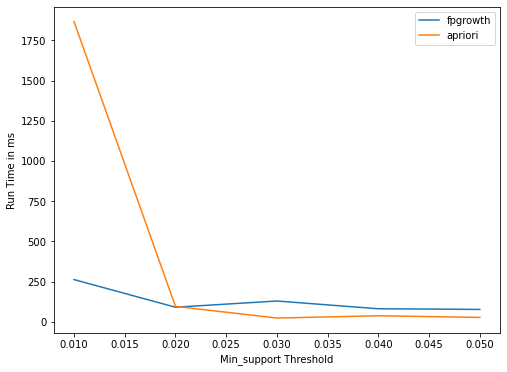

In [86]:
sns.lineplot(x=l,y=f,label="fpgrowth")
sns.lineplot(x=l,y=t,label="apriori")
plt.xlabel("Min_support Threshold")
plt.ylabel("Run Time in ms")

**Author**: Jammal Adeyemi